In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [165]:
#Remove duplicates from Study Results data
study_results_nodupl = study_results.groupby(['Mouse ID', 'Timepoint']).first()
mouse_metadata_nodupl = mouse_metadata.groupby(['Mouse ID']).first()

mouse_metadata_nodupl
study_results_nodupl

Tumor Volume (mm3)  Metastatic Sites
Mouse ID Timepoint                                      
a203     0                   45.000000                 0
         5                   48.508468                 0
         10                  51.852437                 1
         15                  52.777870                 1
         20                  55.173336                 1
...                                ...               ...
z969     25                  63.145652                 2
         30                  65.841013                 3
         35                  69.176246                 4
         40                  70.314904                 4
         45                  73.867845                 4

[1888 rows x 2 columns]

In [166]:
#Mouse DataFrame
mouse_info_df = pd.DataFrame(mouse_metadata_nodupl, columns=["Drug Regimen", "Sex", "Age_months", "Weight (g)"])
mouse_info_df

,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,
a203,Infubinol,Female,20,23
a251,Infubinol,Female,21,25
a262,Placebo,Female,17,29
a275,Ceftamin,Female,20,28
a366,Stelasyn,Female,16,29
...,...,...,...,...
z435,Propriva,Female,12,26
z578,Ramicane,Male,11,16
z581,Infubinol,Female,24,25


In [167]:
#Study DataFrame
study_info_df = pd.DataFrame(study_results_nodupl, columns=["Tumor Volume (mm3)", "Metastatic Sites"])
study_info_df

Tumor Volume (mm3)  Metastatic Sites
Mouse ID Timepoint                                      
a203     0                   45.000000                 0
         5                   48.508468                 0
         10                  51.852437                 1
         15                  52.777870                 1
         20                  55.173336                 1
...                                ...               ...
z969     25                  63.145652                 2
         30                  65.841013                 3
         35                  69.176246                 4
         40                  70.314904                 4
         45                  73.867845                 4

[1888 rows x 2 columns]

In [168]:
#Re-index
study_info_df.reset_index(inplace=True)

In [169]:
study_info_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,0,45.000000,0
1,a203,5,48.508468,0
2,a203,10,51.852437,1
3,a203,15,52.777870,1
4,a203,20,55.173336,1


In [170]:
# Merge two dataframes using an inner join
mouse_merge = pd.merge(mouse_info_df, study_info_df, on="Mouse ID", how="inner")

# Display the data table for preview
mouse_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [171]:
mouse_merge.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).reset_index()

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, 'Number of Measurements')

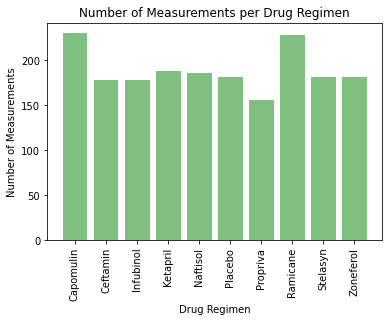

In [172]:
timepoint_totals = mouse_merge.groupby(['Drug Regimen']).count()['Timepoint']
x_axis = np.arange(len(timepoint_totals))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoneferol"], rotation=90)
plt.bar(x_axis, timepoint_totals, color='g', alpha=0.5, align="center")
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

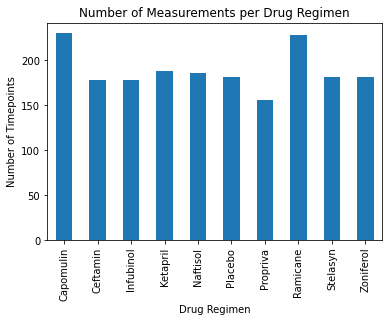

In [176]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
timepoint_totals.plot(kind='bar')
plt.title("Number of Measurements per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

([<matplotlib.patches.Wedge at 0x2837df816a0>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

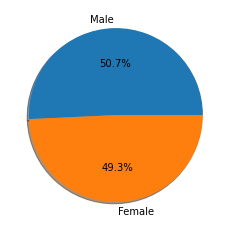

In [177]:
#Get Gender Totals of Study
gender_totals = mouse_merge["Sex"].value_counts()

#Create Pie Chart using plt.pie
labels = ["Male", "Female"]
plt.pie(gender_totals, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)

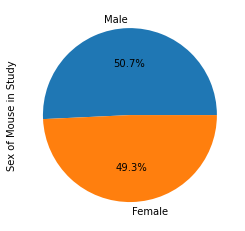

In [178]:
#Create Pie Chart using .plot
gender_totals.plot(kind='pie', autopct="%1.1f%%")
plt.ylabel("Sex of Mouse in Study")
plt.show()

In [179]:
#Create DataFrame for Ramicane
tumor_volume = mouse_merge.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
tumor_vol_ram = tumor_volume.loc[tumor_volume['Drug Regimen'] == 'Ramicane']
tumor_vol_ram_end = tumor_vol_ram.loc[tumor_volume['Timepoint'] == 45]
tumor_vol_ram_end

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
66,a411,Ramicane,45,38.407618
76,a444,Ramicane,45,43.047543
99,a520,Ramicane,45,38.810366
116,a644,Ramicane,45,32.978522
329,c758,Ramicane,45,33.397653
388,d251,Ramicane,45,37.311236
453,e662,Ramicane,45,40.659006
581,g791,Ramicane,45,29.128472
623,i177,Ramicane,45,33.562402
633,i334,Ramicane,45,36.374510


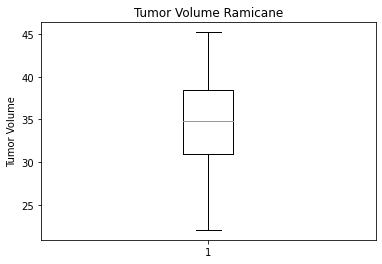

In [194]:
ram_tumor_vol = tumor_vol_ram_end['Tumor Volume (mm3)']
ram_tumor_vol
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Ramicane')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(ram_tumor_vol)
plt.show()

In [196]:
#Determine quartiles and IQR
quartiles = ram_tumor_vol.quantile([0.25,0.50,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumor Volume is: {lowerq}")
print(f"The upper quartile of Ramicane Tumor Volume is: {upperq}")
print(f"The interquartile range of Ramicane Tumor Volume is: {iqr}")
print(f"The the median of Ramicane Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane Tumor Volume is: 30.981175224999998
The upper quartile of Ramicane Tumor Volume is: 38.508305307499995
The interquartile range of Ramicane Tumor Volume is: 7.527130082499998
The the median of Ramicane Tumor Volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [187]:
#Create DataFrame for Capomulin
tumor_vol_cap = tumor_volume.loc[tumor_volume['Drug Regimen'] == 'Capomulin']
tumor_vol_cap_end = tumor_vol_cap.loc[tumor_volume['Timepoint'] == 45]
tumor_vol_cap_end

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
183,b128,Capomulin,45,38.982878
216,b742,Capomulin,45,38.939633
522,g288,Capomulin,45,37.074024
542,g316,Capomulin,45,40.159220
655,i557,Capomulin,45,47.685963
681,i738,Capomulin,45,37.311846
701,j119,Capomulin,45,38.125164
890,l509,Capomulin,45,41.483008
944,l897,Capomulin,45,38.846876
994,m601,Capomulin,45,28.430964


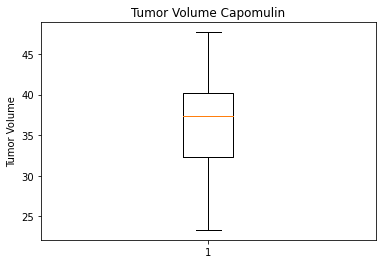

In [198]:
cap_tumor_vol = tumor_vol_cap_end['Tumor Volume (mm3)']
cap_tumor_vol
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Capomulin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(cap_tumor_vol)
plt.show()

In [202]:
#Determine quartiles and IQR
quartiles = cap_tumor_vol.quantile([0.25,0.50,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor Volume is: {lowerq}")
print(f"The upper quartile of Capomulin Tumor Volume is: {upperq}")
print(f"The interquartile range of Capomulin Tumor Volume is: {iqr}")
print(f"The the median of Capomulin Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumor Volume is: 32.37735684
The upper quartile of Capomulin Tumor Volume is: 40.1592203
The interquartile range of Capomulin Tumor Volume is: 7.781863460000004
The the median of Capomulin Tumor Volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [205]:
#Create DataFrame for Infubinol
tumor_vol_inf = tumor_volume.loc[tumor_volume['Drug Regimen'] == 'Infubinol']
tumor_vol_inf_end = tumor_vol_inf.loc[tumor_volume['Timepoint'] == 45]
tumor_vol_inf_end

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,a203,Infubinol,45,67.973419
19,a251,Infubinol,45,65.525743
126,a685,Infubinol,45,66.083066
243,c139,Infubinol,45,72.226731
433,e476,Infubinol,45,62.435404
477,f345,Infubinol,45,60.918767
814,k483,Infubinol,45,66.196912
1784,y163,Infubinol,45,67.685569
1867,z581,Infubinol,45,62.754451


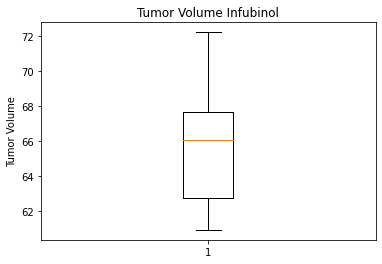

In [210]:
inf_tumor_vol = tumor_vol_inf_end['Tumor Volume (mm3)']
inf_tumor_vol
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Infubinol')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(inf_tumor_vol)
plt.show()

In [207]:
#Determine quartiles and IQR
quartiles = inf_tumor_vol.quantile([0.25,0.50,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Volume is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Volume is: {upperq}")
print(f"The interquartile range of Infubinol Tumor Volume is: {iqr}")
print(f"The the median of Infubinol Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumor Volume is: 62.75445141
The upper quartile of Infubinol Tumor Volume is: 67.68556862
The interquartile range of Infubinol Tumor Volume is: 4.9311172099999965
The the median of Infubinol Tumor Volume is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [208]:
#Create DataFrame for Ceftamin
tumor_vol_cef = tumor_volume.loc[tumor_volume['Drug Regimen'] == 'Ceftamin']
tumor_vol_cef_end = tumor_vol_cef.loc[tumor_volume['Timepoint'] == 45]
tumor_vol_cef_end

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
39,a275,Ceftamin,45,62.999356
724,j296,Ceftamin,45,61.849023
784,k210,Ceftamin,45,68.923185
873,l471,Ceftamin,45,67.748662
903,l661,Ceftamin,45,59.851956
933,l733,Ceftamin,45,64.299830
1081,o287,Ceftamin,45,59.741901
1200,p438,Ceftamin,45,61.433892
1619,w151,Ceftamin,45,67.527482
1744,x581,Ceftamin,45,64.634949


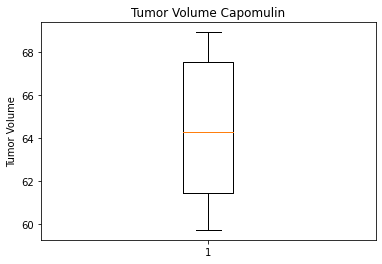

In [211]:
cef_tumor_vol = tumor_vol_cef_end['Tumor Volume (mm3)']
cef_tumor_vol
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Capomulin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(cef_tumor_vol)
plt.show()

In [213]:
#Determine quartiles and IQR
quartiles = cef_tumor_vol.quantile([0.25,0.50,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Volume is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Volume is: {upperq}")
print(f"The interquartile range of Infubinol Tumor Volume is: {iqr}")
print(f"The the median of Infubinol Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumor Volume is: 61.43389223
The upper quartile of Infubinol Tumor Volume is: 67.52748237
The interquartile range of Infubinol Tumor Volume is: 6.093590140000003
The the median of Infubinol Tumor Volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.
